<a href="https://colab.research.google.com/github/Niki-KR/TMO/blob/master/notebooks/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Линейные модели, SVM и деревья решений.

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

## Загрузка набора данных. Разбиение на тестовую и обучающую выборки

In [0]:
X, y = load_wine(return_X_y=True)
X_train,  X_test,  y_train,  y_test =  train_test_split(X,  y,  random_state=42)

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133,)
(45,)


In [0]:
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report

# Отчёт о метриках модели
def test_model(model, x, y):
  results = model.predict(x)
  return classification_report(y, results)

## Классификатор на методе опорных векторов

In [5]:
nu_svc = NuSVC(nu=0.5)
nu_svc.fit(X_train, y_train)
print(test_model(nu_svc, X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Дерево решений

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtc = DecisionTreeClassifier(max_depth=None)
dtc.fit(X_train, y_train)
print("Всего листьев: {}".format(dtc.get_n_leaves()))
print("Глубина дерева: {}\n".format(dtc.get_depth()))
print(test_model(dtc, X_test, y_test))

Всего листьев: 7
Глубина дерева: 4

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Визуализация дерева решений

In [0]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

[Text(418.5, 733.86, 'color_intensity <= 3.82\ngini = 0.658\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(251.10000000000002, 570.78, 'ash <= 3.07\ngini = 0.08\nsamples = 48\nvalue = [2, 46, 0]'),
 Text(167.4, 407.70000000000005, 'proline <= 1010.0\ngini = 0.042\nsamples = 47\nvalue = [1, 46, 0]'),
 Text(83.7, 244.62, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(251.10000000000002, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(334.8, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(585.9, 570.78, 'flavanoids <= 1.4\ngini = 0.57\nsamples = 85\nvalue = [42, 7, 36]'),
 Text(502.20000000000005, 407.70000000000005, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(669.6, 407.70000000000005, 'proline <= 724.5\ngini = 0.245\nsamples = 49\nvalue = [42, 7, 0]'),
 Text(585.9, 244.62, 'alcohol <= 13.145\ngini = 0.219\nsamples = 8\nvalue = [1, 7, 0]'),
 Text(502.20000000000005, 81.54000000000008, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 

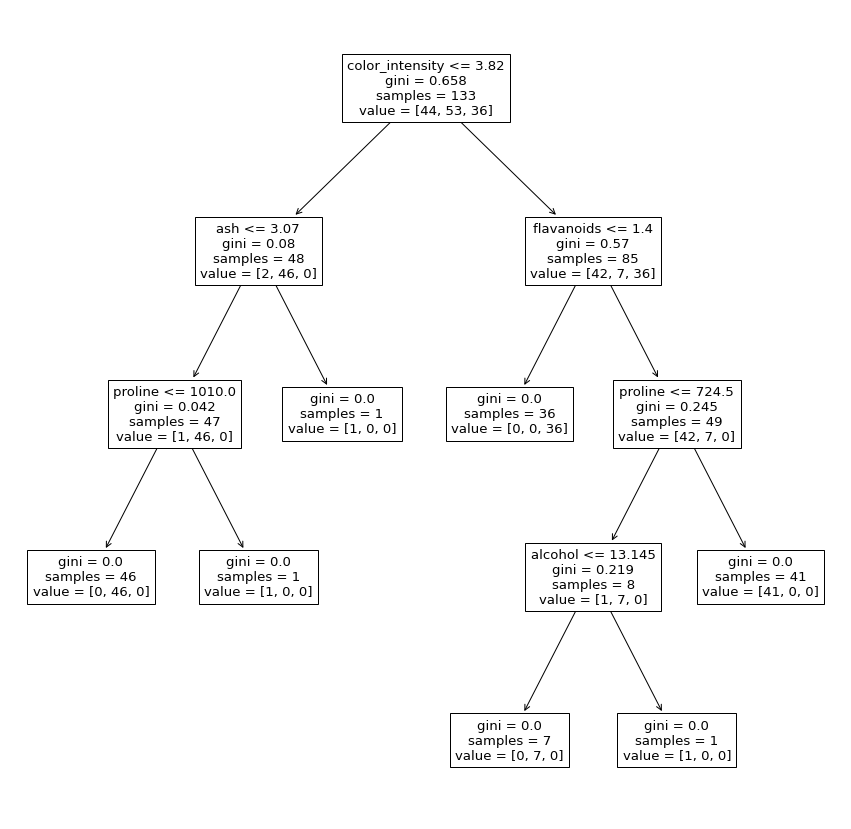

In [9]:
plt.figure(figsize=[15, 15])
plot_tree(dtc, feature_names=load_wine()["feature_names"])